In [357]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [358]:
df = pd.read_csv("amz_uk_price_prediction_dataset.csv")

In [359]:
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [360]:
#interaction between these two categorical variables.
crosstab_result = pd.crosstab(df['category'], df['isBestSeller']).sort_values(True, ascending=False)
crosstab_result

isBestSeller,False,True
category,,
Grocery,9008,556
Health & Personal Care,9017,552
Baby,14709,341
Sports & Outdoors,835935,330
Power & Hand Tools,8353,306
...,...,...
Blank Media Cases & Wallets,243,0
Boating Footwear,140,0
Boxes & Organisers,911,0


In [361]:
# Calculating the proportions for each True in crosstab_result table and rounding the results to four decimal places
#this will add a new column "Proportion" to the table.
proportion=crosstab_result['Proportion'] = (crosstab_result[True] / (crosstab_result[True] + crosstab_result[False])).round(4)

In [362]:
proportion

category
Grocery                        0.0581
Health & Personal Care         0.0577
Baby                           0.0227
Sports & Outdoors              0.0004
Power & Hand Tools             0.0353
                                ...  
Blank Media Cases & Wallets    0.0000
Boating Footwear               0.0000
Boxes & Organisers             0.0000
CD, Disc & Tape Players        0.0000
eBook Readers & Accessories    0.0000
Length: 296, dtype: float64

In [363]:
#In grocery and health&personal care being a best-seller is more prevalent than other categories.

In [364]:
#Statistical Tests
#Chi-square test to determine if the best-seller distribution is independent of the product category.
from scipy.stats import chi2_contingency

# Chi-square test for 'isBestSeller' and 'category'
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab_result)

chi2_statistic, chi2_p_value

(np.float64(36684.25740305413), np.float64(0.0))

In [365]:
#chi-square test p-value= 0 < 0.05 
#If the p-value is extremely small (close to 0), it means the observed data would be very 
#unlikely under the assumption of independence, leading to the conclusion that the variables are not independent
#(i.e., they are associated/dependent). Rejection of null hypothesis.

In [366]:
crosstab_result.drop(columns=["Proportion"],inplace=True) #I dropped the additional column created above.Original dataframe modified with inplace=True.

In [367]:
from scipy.stats.contingency import association
association(crosstab_result, method="cramer")

0.1222829439760564

In [368]:
#0.12 CramerS V indicates a weak association between category and the likelihood of being a best seller.

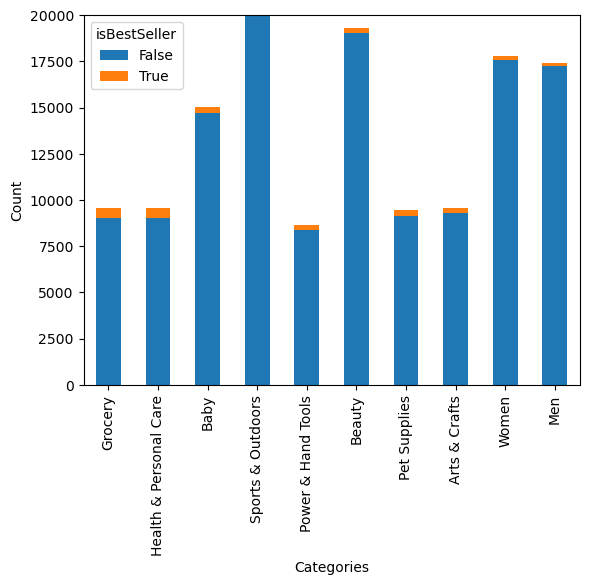

In [369]:
top10=crosstab_result.head(10)
top10.plot(kind="bar", stacked=True)
plt.ylabel("Count")
plt.xlabel("Categories")
plt.ylim(0, 20000)
plt.show()
#Note: y-axis represents the count (frequency) of observations for each combination of categories and isBestseller status.
#How many isBestseller status there are in each category.

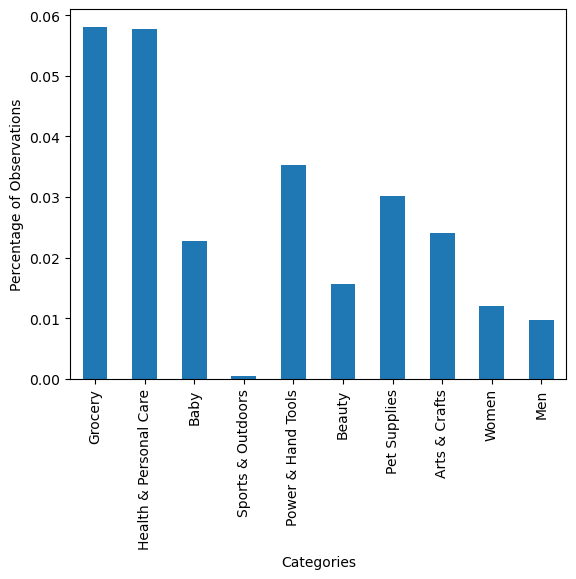

In [370]:
#Proportions Bar chart
proportion10=proportion.head(10)
proportion10.plot(kind="bar", stacked=True)
plt.ylabel("Percentage of Observations")
plt.xlabel("Categories")
plt.show()
# approx. 6% of Best Sellers are Grocery products 

In [371]:
#Part 2: Exploring Product Prices and Ratings Across Categories and Brands

In [372]:
min_price = df['price'].min()
max_price = df['price'].max()
range_price = max_price - min_price
quantiles_price = df['price'].quantile([0.25, 0.5, 0.75])
min_price, max_price, range_price, quantiles_price

(0.0,
 100000.0,
 100000.0,
 0.25     9.99
 0.50    19.09
 0.75    45.99
 Name: price, dtype: float64)

In [373]:
Q1 = df['price'].quantile(0.25)  # 25th percentile (Q1)
Q3 = df['price'].quantile(0.75)  # 75th percentile (Q3)
IQR = Q3 - Q1

In [374]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [375]:
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

In [376]:
outliers

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
10,11,B08VDNCZT9,JBL Charge 5 - Portable Bluetooth Speaker with...,4.8,11920,139.00,False,0,Hi-Fi Speakers
19,20,B07NQCKJSH,Echo Studio | Our best-sounding Wi-Fi and Blue...,4.5,14222,164.99,False,0,Hi-Fi Speakers
25,26,B0BLS36M5R,All-new Echo Show 8 | 3rd generation (2023 rel...,0.0,0,149.99,False,0,Hi-Fi Speakers
28,29,B096G3R7C3,JBL PartyBox110 Portable Indoor and Outdoor Pa...,4.8,153,289.00,False,0,Hi-Fi Speakers
31,32,B08MQRDDYB,"Echo Show 15 | Full HD 15.6"" smart display wit...",4.4,2616,199.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443619,2828560,B07JLZB7YY,Motorcycle Clothing Suit - Motorbike Suit With...,0.0,0,166.99,False,0,Motorbike Clothing
2443627,2828568,B005QN452A,Racer Beasty Ladies Leather Motorbike Trousers,3.8,181,152.58,False,0,Motorbike Clothing
2443638,2828579,B084R261ML,"SHIMA EXO Vented, Motorbike Shoes for Women | ...",4.6,209,108.77,False,0,Motorbike Clothing
2443641,2828582,B07JM93SCC,Motorcycle Clothing Suit - Motorbike Suit With...,0.0,0,166.99,False,0,Motorbike Clothing


In [377]:
#filtering out the outliers
df_filtered = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

In [378]:
df_filtered

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [379]:
#top20 categories by count.
frequency_table = df_filtered['category'].value_counts()
top20=frequency_table.head(20)
top20


category
Sports & Outdoors                         694092
Beauty                                     19233
Bath & Body                                19050
Manicure & Pedicure Products               18904
Handmade Clothing, Shoes & Accessories     18811
Make-up                                    18718
Skin Care                                  18686
Hair Care                                  18625
Birthday Gifts                             18398
Handmade Gifts                             17948
Handmade Home Décor                        17675
Luggage and travel gear                    17557
Women                                      17476
Fragrances                                 17431
Handmade Kitchen & Dining                  17346
Handmade Artwork                           17269
Handmade Home & Kitchen Products           17175
Handmade Jewellery                         17135
Men                                        16596
Baby                                       14883
Name: count

C:\Users\carpa\AppData\Local\Temp\ipykernel_69396\15647728.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_top, x='category', y='price', palette="coolwarm")


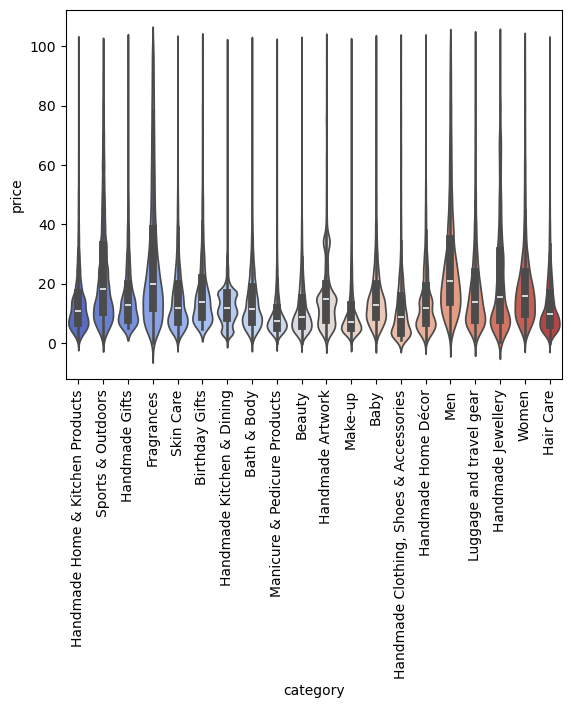

In [380]:
#Use a violin plot to visualize the distribution of price across different product categories. 
#Filter out the top 20 categories based on count for better visualization.
#Which product category tends to have the highest median price? Don't filter here by top categories.
top20= df_filtered['category'].value_counts().head(20).index #names of the top 20 categories
df_top = df_filtered[df_filtered['category'].isin(top20)] #only keeping the rows where the column category is in the list of top20 categories.
sns.violinplot(data=df_top, x='category', y='price', palette="coolwarm")
plt.xticks(rotation=90)
plt.show()

In [381]:
#Which product category tends to have the highest median price? Don't filter here by top categories.
median_prices = df_top.groupby('category')['price'].median()

In [382]:
highest_median_value = median_prices.max()
highest_median_category = median_prices.idxmax()
print (highest_median_value, highest_median_category) 

20.99 Men


In [383]:
#Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
top10=frequency_table.head(10).index

In [384]:
top10_df = df_top[df_top['category'].isin(top10)]

# 3. Calculate average price for each top product
avg_prices = top10_df.groupby('category')['price'].mean().sort_values(ascending=False)

In [385]:
avg_prices

category
Sports & Outdoors                         25.172065
Birthday Gifts                            18.600195
Handmade Gifts                            17.395112
Skin Care                                 15.654722
Bath & Body                               14.678683
Hair Care                                 13.461408
Handmade Clothing, Shoes & Accessories    12.958639
Beauty                                    12.523480
Make-up                                   10.612918
Manicure & Pedicure Products              10.231825
Name: price, dtype: float64

C:\Users\carpa\AppData\Local\Temp\ipykernel_69396\268672068.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_prices.index, y=avg_prices.values, palette="Set3")


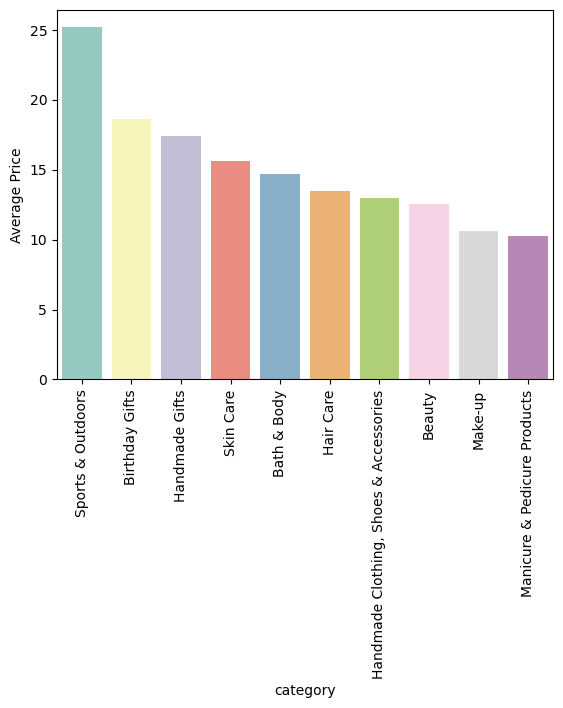

In [386]:
sns.barplot(x=avg_prices.index, y=avg_prices.values, palette="Set3")
plt.xticks(rotation=90)
plt.ylabel("Average Price")
plt.show();

C:\Users\carpa\AppData\Local\Temp\ipykernel_69396\3033132732.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_df_top10, x='category', y='stars', palette="coolwarm")


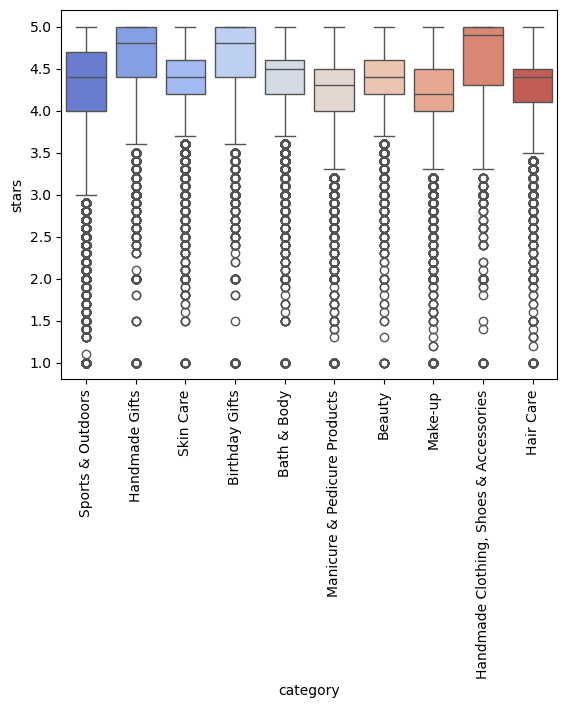

In [387]:
filtered_df_top10 = top10_df[top10_df['stars'] != 0]
#top10_df2 = filtered_df_top10[df['category'].isin(top10)]

sns.boxplot(data=filtered_df_top10, x='category', y='stars', palette="coolwarm")
plt.xticks(rotation=90)
plt.show()

In [388]:
filtered_df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443642,2828585,B07DCFQMQL,Speed MaxX BODY ARMOUR CE MOTORBIKE/MOTORCYCLE...,3.6,66,49.99,False,0,Motorbike Clothing
2443643,2828586,B07JM5VQFX,Motorcycle Clothing Suit - Motorbike Suit With...,4.1,5,158.99,False,0,Motorbike Clothing
2443644,2828587,B07X98JLFF,GREAT BIKERS GEAR - Bobber Cafe Brat Style Lea...,3.6,12,14.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [389]:
median_stars = filtered_df.groupby('category')['stars'].median()
highest_median_value = median_stars.max()
highest_median_category = median_stars.idxmax()
print (highest_median_value, highest_median_category) 

5.0 Handmade Artwork


In [390]:
#Part 3: Investigating the Interplay Between Product Prices and Ratings
# Calculating the Pearson correlation coefficient 


In [391]:
from scipy.stats import pearsonr, spearmanr
correlation, p_value = pearsonr(filtered_df['price'], filtered_df['stars'])
correlation, p_value

(np.float64(-0.004911823000752926), np.float64(5.9304226696573544e-08))

In [392]:
# Calculating the Spearman rank correlation 
correlation, p_value = spearmanr(filtered_df['price'], filtered_df['stars'])
correlation, p_value

(np.float64(0.020035042659527928), np.float64(2.340125602292736e-108))

In [393]:
#p-value<0.05 -> variables are not independent of each other. Very weak significant correlation between price and stars.

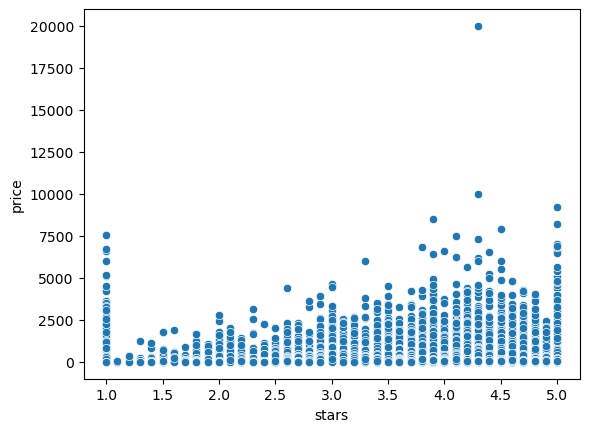

In [394]:
sns.scatterplot(data=filtered_df, x='stars', y='price')
plt.show()

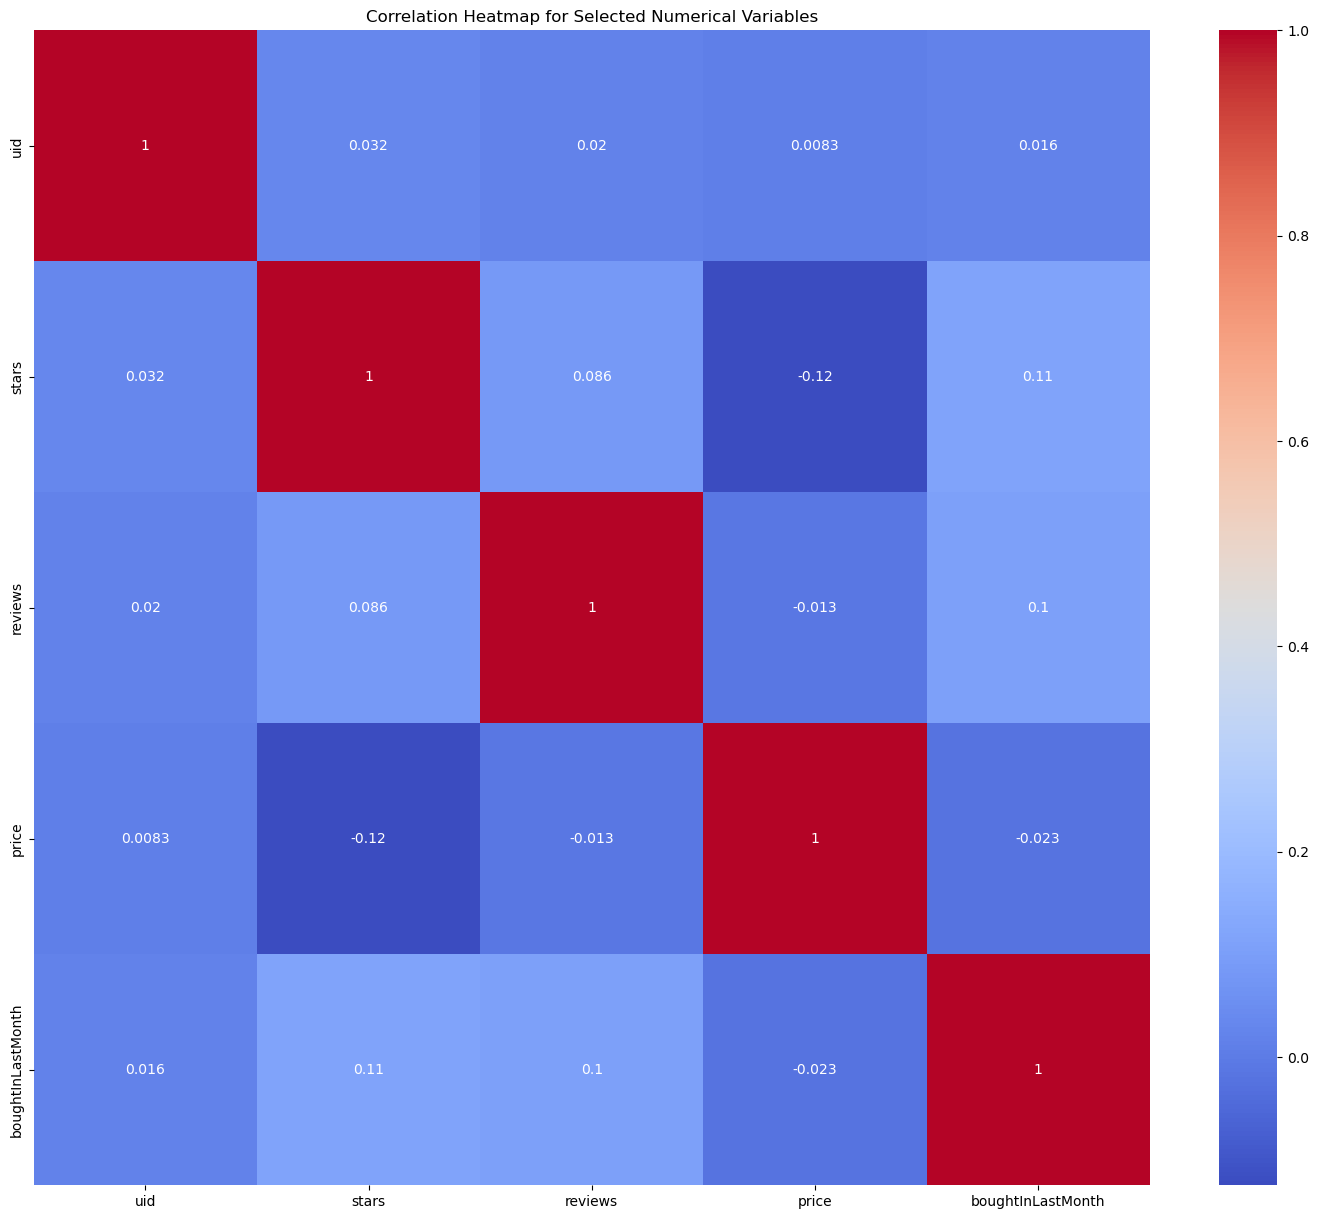

In [395]:
df_numerical = df.select_dtypes(include=['int64', 'float64'])

correlation_matrix = df_numerical.corr()

# Setting up the matplotlib figure with an appropriate size
plt.figure(figsize=(18, 15))

# Drawing the heatmap for the numerical columns
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap for Selected Numerical Variables")
plt.show()

In [396]:
import statsmodels.api as sm

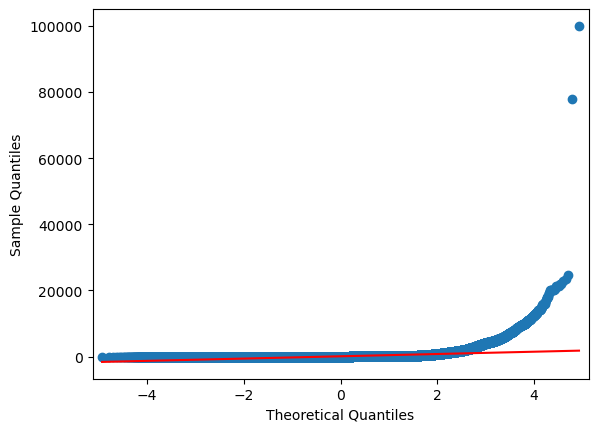

In [397]:
sm.qqplot(df['price'],line='s')

In [398]:
#In the upper tail (right side of the plot), the data points deviate significantly from the red line, suggesting 
#a long tail or skewness to the right. This indicates that there are more extreme high values in price 
#than would be expected in a normal distribution.